In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import icnn
import numpy as np
from matplotlib import pyplot as plt
import torch.optim as optim

/home/fengjun/.virtualenvs/general/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Generate data

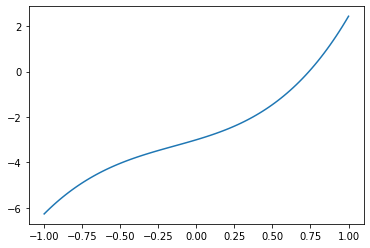

In [3]:
x = torch.linspace(-1, 1, 100, dtype=torch.double)
y = 2* x ** 3 + 2 * np.exp(x) - 5
_, = plt.plot(x, y)

## Train regressor

In [4]:
num_epoch = 15000
model = icnn.ICNN(1, [50, 50, 50, 1])
lr = 0.001
lossfn = nn.MSELoss(reduction='sum')
verbose = True

In [10]:
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.CosineAnnealingLR(
          optimizer, num_epoch)
for epoch in range(num_epoch):
    model.zero_grad()
    yhat = model.forward(x.unsqueeze(1))
    loss = lossfn(yhat, y.unsqueeze(1))
    if(verbose and epoch % 1000 == 0):
        print('Epoch: {} \t Loss: {}'.format(epoch+1, loss.item()))
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), 10)
    optimizer.step()
    scheduler.step()

Epoch: 1 	 Loss: 20.785637360133798
Epoch: 1001 	 Loss: 4.53488858832575
Epoch: 2001 	 Loss: 3.6968402068159207
Epoch: 3001 	 Loss: 3.911467446551831
Epoch: 4001 	 Loss: 3.540069861385075
Epoch: 5001 	 Loss: 3.235480174113336
Epoch: 6001 	 Loss: 3.3026490338245833
Epoch: 7001 	 Loss: 2.9434832270257525
Epoch: 8001 	 Loss: 3.0184263295346057
Epoch: 9001 	 Loss: 2.9201534921503125
Epoch: 10001 	 Loss: 2.833872863665341
Epoch: 11001 	 Loss: 2.819168490076247
Epoch: 12001 	 Loss: 2.800559380602835
Epoch: 13001 	 Loss: 2.793740888190017
Epoch: 14001 	 Loss: 2.79110423249423


## Plot result

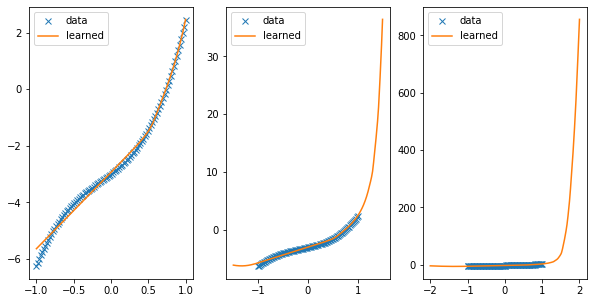

In [12]:
lim = [1, 1.5, 2]

fig = plt.figure(figsize=(10,5))
for i, l in enumerate(lim):
    plt.subplot(1,len(lim),i+1)
    # Plot data
    _, = plt.plot(x, y, 'x', label='data')
    # Plot interpolation
    xtest = torch.linspace(-l, l, 300, dtype=torch.double)
    yhat = model.forward(xtest.unsqueeze(1)).detach()
    plt.plot(xtest, yhat, label='learned')
    _ = plt.legend()